<h1> COVID-19 Data Extraction</h2>

Import the required modules and load the url

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
url1='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url1, error_bad_lines=False)
df_conf=df.drop(columns=["Lat","Long"])
df_conf=df_conf.transpose()
df_conf=df_conf[[14]]
df_conf=df_conf.drop(index=['Province/State','Country/Region'])
df_conf=df_conf.reset_index(inplace=False)
df_conf=df_conf.rename(columns={"index":"Date",14:"Victoria"}) 
df_conf

,Date,Victoria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,1
...,...,...
209,8/18/20,17446
210,8/19/20,17683
211,8/20/20,17852
212,8/21/20,18029


In [3]:
url2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_1 = pd.read_csv(url2, error_bad_lines=False)
df_death=df_1.drop(columns=["Lat","Long"])
df_death=df_death.transpose()
df_death=df_death[[14]]
df_death=df_death.drop(index=['Province/State','Country/Region'])
df_death=df_death.reset_index(inplace=False)
df_death=df_death.rename(columns={"index":"Date",14:"Victoria"}) 
df_death

,Date,Victoria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
209,8/18/20,363
210,8/19/20,376
211,8/20/20,385
212,8/21/20,398


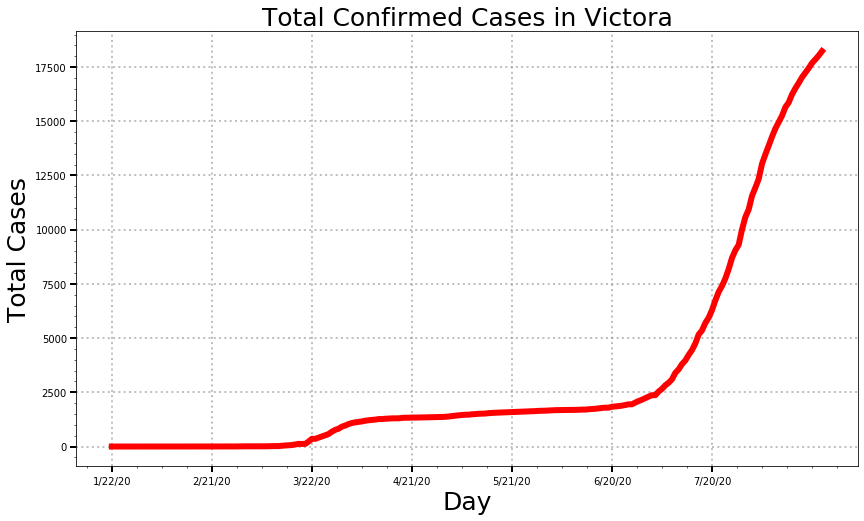

In [4]:
plt.figure(figsize=(14,8))
plt.xticks(np.arange(0, 210, 30))
plt.plot(df_conf['Date'], df_conf['Victoria'], 
            color='red', linewidth=6,label='Recorded data')
plt.title(r"Total Confirmed Cases in Victora",fontsize=25)
plt.ylabel('Total Cases' ,fontsize=25)
plt.xlabel('Day', fontsize=25)
plt.grid(b=True,color='red', alpha=0.3, linestyle=':', linewidth=2)
plt.minorticks_on()
plt.tick_params(axis='both', direction='out', length=6, width=2, 
                     grid_color='gray', grid_alpha=0.5)

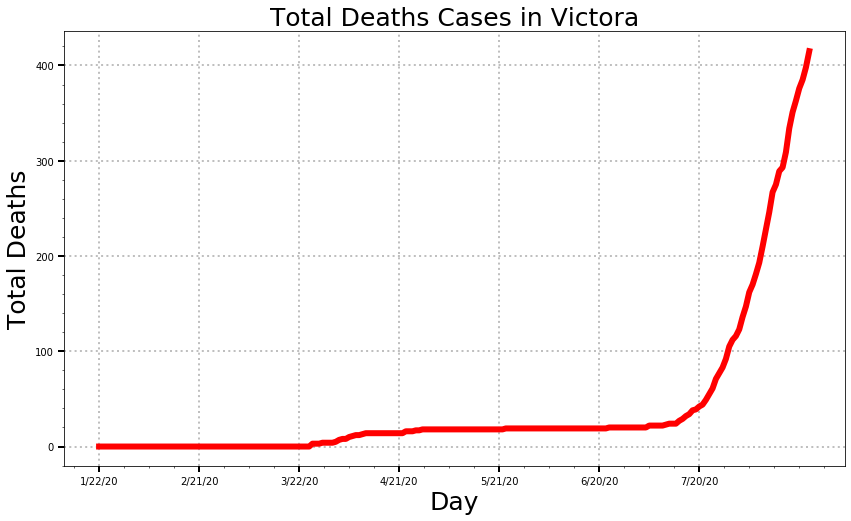

In [5]:
plt.figure(figsize=(14,8))
plt.xticks(np.arange(0, 210, 30))
plt.plot(df_death['Date'], df_death['Victoria'], 
            color='red', linewidth=6,label='Recorded data')
plt.title(r"Total Deaths Cases in Victora",fontsize=25)
plt.ylabel('Total Deaths' ,fontsize=25)
plt.xlabel('Day', fontsize=25)
plt.grid(b=True,color='red', alpha=0.3, linestyle=':', linewidth=2)
plt.minorticks_on()
plt.tick_params(axis='both', direction='out', length=6, width=2, 
                     grid_color='gray', grid_alpha=0.5)

In [6]:
with pd.ExcelWriter('vic_cases_covid.xlsx') as writer:  
    df_conf.to_excel(writer, sheet_name='cases')
    df_death.to_excel(writer, sheet_name='deaths')